# Chapter 3

## 3.2

## 3.2.1 digits dataset

### data overview

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

In [18]:
#download digits data
digits = datasets.load_digits()

#show attributes of digits dataset
print(type(digits))
print(dir(digits))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'images', 'target', 'target_names']


Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

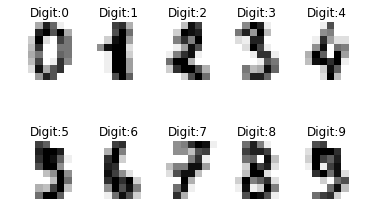

In [19]:
#show description of dataset
print(digits.DESCR)

#show sample images of each class
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2,5,label+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit:{0}'.format(label))

plt.show()

### classify 3 and 8 by dicision tree (default setting)

In [37]:
#get position of 3 and 8 in dataset
flag_3_8 = (digits.target==3) + (digits.target==8)

#get images and labels of 3 and 8
images  =digits.images[flag_3_8]
labels  =digits.target[flag_3_8]

#convert image into one-dimensional array
images = images.reshape(images.shape[0], -1)

In [38]:
from sklearn import tree

n_samples = len(flag_3_8[flag_3_8])
train_ratio = 0.6

train_size = int(n_samples * train_ratio)

In [40]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(images[:train_size], labels[:train_size])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### evaluate result

In [43]:
from sklearn import metrics

expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

In [46]:
print('Accuracy:{0}'.format(metrics.accuracy_score(expected, predicted)))
print('\nConfusion Matrix:\n',
      metrics.confusion_matrix(expected, predicted))
print('\nPrecision:\n',
      metrics.precision_score(expected, predicted, pos_label=3))
print('\nRecall:\n',
      metrics.recall_score(expected, predicted, pos_label=3))
print('\nF-measure:\n',
      metrics.f1_score(expected, predicted, pos_label=3))


Accuracy:0.8601398601398601

Confusion Matrix:
 [[60 15]
 [ 5 63]]

Precision:
 0.9230769230769231

Recall:
 0.8

F-measure:
 0.8571428571428571


### set depth of decision tree 3

In [48]:
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(images[:train_size], labels[:train_size])

expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:{0}'.format(metrics.accuracy_score(expected, predicted)))
print('\nConfusion Matrix:\n',
      metrics.confusion_matrix(expected, predicted))
print('\nPrecision:\n',
      metrics.precision_score(expected, predicted, pos_label=3))
print('\nRecall:\n',
      metrics.recall_score(expected, predicted, pos_label=3))
print('\nF-measure:\n',
      metrics.f1_score(expected, predicted, pos_label=3))

Accuracy:0.8601398601398601

Confusion Matrix:
 [[60 15]
 [ 5 63]]

Precision:
 0.9230769230769231

Recall:
 0.8

F-measure:
 0.8571428571428571


### original part:visualize decision tree

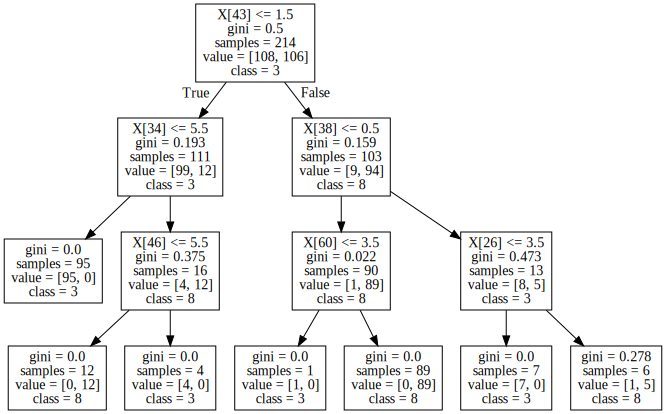

In [55]:
import graphviz



dot_data = tree.export_graphviz(classifier, out_file=None,
                                class_names = ['3', '8']) 
graph = graphviz.Source(dot_data)
graph

 ## 3.5.2 Random Forest - ensembling dicision trees

In [56]:
from sklearn import ensemble

classifier = ensemble.RandomForestClassifier(n_estimators=20, 
                                            max_depth=3,
                                            criterion='gini')

/Users/Shota_O/.pyenv/versions/anaconda3-5.0.1/envs/python_learning/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [57]:
classifier.fit(images[:train_size], labels[:train_size])

expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:{0}'.format(metrics.accuracy_score(expected, predicted)))
print('\nConfusion Matrix:\n',
      metrics.confusion_matrix(expected, predicted))
print('\nPrecision:\n',
      metrics.precision_score(expected, predicted, pos_label=3))
print('\nRecall:\n',
      metrics.recall_score(expected, predicted, pos_label=3))
print('\nF-measure:\n',
      metrics.f1_score(expected, predicted, pos_label=3))

Accuracy:0.9090909090909091

Confusion Matrix:
 [[63 12]
 [ 1 67]]

Precision:
 0.984375

Recall:
 0.84

F-measure:
 0.9064748201438849


## 3.5.3 AdaBoost -boosting ensemble

In [58]:
from sklearn import ensemble

#define weak classifier
estimator = tree.DecisionTreeClassifier(max_depth=3)

#define adaboost classifier
classifier = ensemble.AdaBoostClassifier(base_estimator=estimator, 
                                        n_estimators=20)

In [59]:
classifier.fit(images[:train_size], labels[:train_size])

expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:{0}'.format(metrics.accuracy_score(expected, predicted)))
print('\nConfusion Matrix:\n',
      metrics.confusion_matrix(expected, predicted))
print('\nPrecision:\n',
      metrics.precision_score(expected, predicted, pos_label=3))
print('\nRecall:\n',
      metrics.recall_score(expected, predicted, pos_label=3))
print('\nF-measure:\n',
      metrics.f1_score(expected, predicted, pos_label=3))

Accuracy:0.9230769230769231

Confusion Matrix:
 [[64 11]
 [ 0 68]]

Precision:
 1.0

Recall:
 0.8533333333333334

F-measure:
 0.9208633093525179


## 3.5.4 Support Vector Machine

In [69]:
from sklearn import svm

classifier = svm.SVC(C=1.0, gamma=0.001)

In [70]:
classifier.fit(images[:train_size], labels[:train_size])

expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:{0}'.format(metrics.accuracy_score(expected, predicted)))
print('\nConfusion Matrix:\n',
      metrics.confusion_matrix(expected, predicted))
print('\nPrecision:\n',
      metrics.precision_score(expected, predicted, pos_label=3))
print('\nRecall:\n',
      metrics.recall_score(expected, predicted, pos_label=3))
print('\nF-measure:\n',
      metrics.f1_score(expected, predicted, pos_label=3))

Accuracy:0.9370629370629371

Confusion Matrix:
 [[66  9]
 [ 0 68]]

Precision:
 1.0

Recall:
 0.88

F-measure:
 0.9361702127659575
